In [5]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [15]:
!pip install jiwer
!pip install evaluate

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.signal import resample
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader


from transformers import WhisperTokenizer
from transformers import WhisperFeatureExtractor
from transformers import WhisperForConditionalGeneration

In [2]:
import evaluate
from jiwer import cer

def down_sample_audio(audio_original, original_sample_rate):
    target_sample_rate = 16000

    # Calculate the number of samples for the target sample rate
    num_samples = int(len(audio_original) * target_sample_rate / original_sample_rate)

    # Resample the audio array to the target sample rate
    downsampled_audio = resample(audio_original, num_samples)

    return downsampled_audio

In [4]:
from transformers import WhisperTokenizer, WhisperFeatureExtractor, WhisperForConditionalGeneration
import torch

# Define device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and feature extractor
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-tiny", language="spanish", task="transcribe")
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-tiny", language="spanish", task="transcribe")

# Load model and move to appropriate device
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny").to(device)

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
odia_text = "Upepeténtevoi omopu'ã tapỹi tupemi ha oiko ipype ha'eño peteĩ"

tokenized_text = tokenizer(odia_text)

tokenizer.decode(tokenized_text.input_ids)

"<|startoftranscript|><|es|><|transcribe|><|notimestamps|>Upepeténtevoi omopu'ã tapỹi tupemi ha oiko ipype ha'eño peteĩ<|endoftext|>"

In [32]:
from huggingface_hub import notebook_login
notebook_login()

In [7]:
from datasets import load_dataset_builder

# Inspect dataset without downloading data
dataset_builder = load_dataset_builder("mozilla-foundation/common_voice_17_0", "gn")
print(dataset_builder.info.splits)
print(dataset_builder.info.features)

README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_17_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_17_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
None
{'client_id': Value(dtype='string', id=None), 'path': Value(dtype='string', id=None), 'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None), 'up_votes': Value(dtype='int64', id=None), 'down_votes': Value(dtype='int64', id=None), 'age': Value(dtype='string', id=None), 'gender': Value(dtype='string', id=None), 'accent': Value(dtype='string', id=None), 'locale': Value(dtype='string', id=None), 'segment': Value(dtype='string', id=None), 'variant': Value(dtype='string', id=None)}


In [8]:
from datasets import load_dataset,concatenate_datasets

#cv_19 = load_dataset("fsicoli/common_voice_19_0", "gn", split="train")
cv_17 = load_dataset("mozilla-foundation/common_voice_17_0", "gn", split=["train","other","test"])

n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

gn_train_0.tar:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

gn_dev_0.tar:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

gn_test_0.tar:   0%|          | 0.00/24.8M [00:00<?, ?B/s]

gn_other_0.tar:   0%|          | 0.00/532M [00:00<?, ?B/s]

gn_invalidated_0.tar:   0%|          | 0.00/4.77M [00:00<?, ?B/s]

gn_validated_0.tar:   0%|          | 0.00/76.6M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/453k [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/100k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/240k [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/5.48M [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/45.8k [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/828k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1571it [00:00, 73538.29it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 360it [00:00, 83825.54it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 855it [00:00, 75545.18it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 18778it [00:00, 117042.92it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 162it [00:00, 67248.34it/s]


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2909it [00:00, 84875.76it/s]


In [9]:
train_data = concatenate_datasets([cv_17[0],cv_17[1]])
test_data = cv_17[2]

In [17]:
train_data[0]


{'client_id': '06ca3b22d3060995b3f4b7dd9a62eee53b8031c93cd4221342e19ed995913a9aaf1cd6fef18231d35504ea41a3f937bb2c7d31077f2baf63d0cd1aae855b7168',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/cfd667b017e136dd4950ed00a6ae469bdb593c78ac8b895aa8a234d750b1838c/gn_train_0/common_voice_gn_32418212.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/cfd667b017e136dd4950ed00a6ae469bdb593c78ac8b895aa8a234d750b1838c/gn_train_0/common_voice_gn_32418212.mp3',
  'array': array([ 0.00000000e+00, -7.67386155e-13, -1.33582034e-12, ...,
          1.11022302e-16,  0.00000000e+00, -2.22044605e-16]),
  'sampling_rate': 48000},
 'sentence': 'Mbaʼevete ndereguerahamoʼãi koʼágui.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'thirties',
 'gender': 'male_masculine',
 'accent': '',
 'locale': 'gn',
 'segment': '',
 'variant': ''}

In [18]:
text = train_data[0]['sentence']
tok_sentence = tokenizer(text)
tok_sentence

{'input_ids': [50258, 50262, 50359, 50363, 44, 4231, 134, 120, 13379, 3498, 220, 273, 323, 2794, 260, 545, 10502, 134, 120, 1046, 72, 8384, 134, 120, 842, 2794, 72, 13, 50257], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [19]:
from IPython.display import clear_output
import time

for idx in range(len(tok_sentence.input_ids)):
    print(tokenizer.decode(tok_sentence.input_ids[:idx]))
    clear_output(wait=True)
    time.sleep(.1)

<|startoftranscript|><|es|><|transcribe|><|notimestamps|>Mbaʼevete ndereguerahamoʼãi koʼágui.


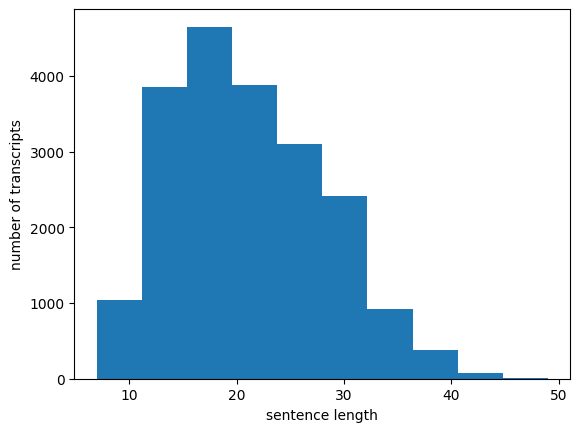

In [20]:
list_of_transcription_lengths = []

tokenized_text = tokenizer(train_data['sentence']).input_ids

for text in tokenized_text:
    list_of_transcription_lengths.append(len(text))
    # break

plt.hist(list_of_transcription_lengths)
plt.xlabel("sentence length")
plt.ylabel("number of transcripts")
plt.show()

In [10]:
import torch

for idx in range(5):

    target = train_data[idx]['sentence']
    audio_original = train_data[idx]['audio']['array']
    original_sample_rate = train_data[idx]['audio']['sampling_rate']

    audio_16000 = down_sample_audio(audio_original, original_sample_rate)

    input_feature = feature_extractor(raw_speech=audio_16000,
                                    sampling_rate=16000,
                                    return_tensors='pt').input_features

    with torch.no_grad():
        op = model.generate(input_feature.to('cuda'), language='spanish', task='transcribe')


    text_pred =  tokenizer.batch_decode(op,skip_special_tokens=True )[0]

    print(f'-------{idx}------')
    print(f'true : {target} \npred : {text_pred}')
    print('\n ')

You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


-------0------
true : Mbaʼevete ndereguerahamoʼãi koʼágui. 
pred :  Pero evité en que le vuelas a moón a y coar.

 
-------1------
true : Heta rehasa'asýkuri. 
pred :  ¡Hetarejasas, Curi!

 
-------2------
true : térã katu oñemonge. 
pred :  Tena, catú, o niemonge.

 
-------3------
true : Oĩ ombotýva hesa, omañáva yvate, ambuévakatu yvýre. 
pred :  Hoy, un botewa esa, o manialo debate, ambo evacatu, uver.

 
-------4------
true : Tani oho gua'i retãme. 
pred :  Tani ojo, oate ir etame.

 


In [11]:

class whisper_training_dataset(torch.utils.data.Dataset):
    def __init__(self, dataset, max_len):#daatset is huggingface dataset object
        self.dataset = dataset
        self.max_len = max_len
        self.bos_token = model.config.decoder_start_token_id

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        audio_data = down_sample_audio(item['audio']["array"], item['audio']["sampling_rate"])
        input_features = feature_extractor(audio_data, sampling_rate=16000,return_tensors='pt').input_features[0]

        # Process the transcription
        transcription = item["sentence"]

        # Create labels
        labels = tokenizer(transcription, padding="max_length", max_length=self.max_len, truncation=True, return_tensors="pt")
        labels = labels["input_ids"].masked_fill(labels['attention_mask'].ne(1), -100)
        labels = labels[0][1:]


        return {
            "input_features": input_features,
            "labels": labels
        }

In [12]:
dataset = whisper_training_dataset(dataset=train_data, max_len=300)

train_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=8,  # Adjust batch size as needed
    shuffle=True,  # Shuffle data during training
)

### Original implementation of "evaluate()"
Changed later because it used the function wer in a wrong way

In [22]:
import jiwer

def evaluation(model):

    device='cuda'

    test_dataset = whisper_training_dataset(dataset=test_data, max_len=300)

    test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=8,  # Adjust batch size as needed
        shuffle=True,  # Shuffle data during training
    )

    model.eval()

    predictions=[]
    references=[]

    for batch in tqdm(test_dataloader,total=len(test_dataloader)):

        model.train()  # Set model to training mode

        input_features, labels = batch["input_features"].to(device), batch["labels"].to(device)

        with torch.no_grad():
            generated_tokens = model.generate(input_features=input_features,language='bengali', task='transcribe')

        decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        predictions.extend(decoded_preds)
        references.extend(decoded_labels)

    WER = jiwer.wer.compute(predictions=predictions, references=references) * 100

    return WER

### New implementation of "evaluate()"
Let see if itt works

In [24]:
import jiwer  # Ensure jiwer is imported

def evaluation(model):
    device = 'cuda'

    test_dataset = whisper_training_dataset(dataset=test_data, max_len=300)

    test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=8,  # Adjust batch size as needed
        shuffle=True,  # Shuffle data during training
    )

    model.eval()

    predictions = []
    references = []

    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # Note: Remove model.train() as it contradicts model.eval()
        input_features, labels = batch["input_features"].to(device), batch["labels"].to(device)

        with torch.no_grad():
            generated_tokens = model.generate(input_features=input_features, language='bengali', task='transcribe')

        decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        predictions.extend(decoded_preds)
        references.extend(decoded_labels)

    # Correct WER calculation using jiwer.wer
    WER = jiwer.wer(references, predictions) * 100  # Note: references first, then predictions

    return WER

In [25]:
# WER before the training
torch.cuda.empty_cache()
evaluation(model)

100%|██████████| 107/107 [05:10<00:00,  2.90s/it]


324.23131170662907

In [ ]:
# from peft import LoraConfig, PeftModel, LoraModel, LoraConfig, get_peft_model

# config = LoraConfig(r=32, lora_alpha=64, target_modules=["q_proj", "v_proj", "q_proj", "out_proj"], lora_dropout=0.05, bias="none")

# model = get_peft_model(model, config)
# model.print_trainable_parameters()

# model.save_pretrained('lora_model')

# model = PeftModel.from_pretrained(model,model_id='lora_model')

# for n,p in model.named_parameters():
#     print(n,p.requires_grad)

# Filter parameters with requires_grad=True
# requires_grad_params = filter(lambda x: x[1].requires_grad, model.parameters())

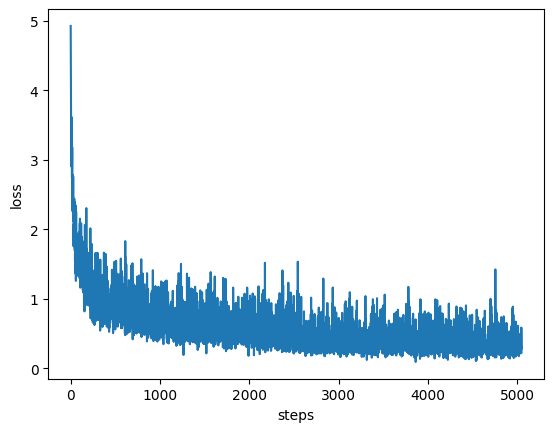

100%|██████████| 107/107 [03:24<00:00,  1.91s/it]


In [26]:
from IPython.display import clear_output
torch.cuda.empty_cache()

model.train()

device='cuda'

optimizer=torch.optim.AdamW(model.parameters(), lr=1e-5)
# optimizer=torch.optim.AdamW(requires_grad_params, lr=5e-4) # Only for LoRA Training

max_epochs=2


running_wer=[]
running_loss=[]



for epoch in range(max_epochs):

    for batch in tqdm(train_dataloader,total=len(train_dataloader),leave=False):

        model.train()  # Set model to training mode

        input_features, labels = batch["input_features"].to(device), batch["labels"].to(device)

        # Forward pass
        outputs = model(input_features, labels=labels)  # Assuming your model takes these inputs
        loss = outputs.loss

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()  # Reset gradients

        running_loss.append(loss.item())

        if len(running_loss) % 50 ==0:  # Print loss every 50 batches
            plt.plot(running_loss)
            plt.xlabel('steps')
            plt.ylabel('loss')
            clear_output(wait=True)  # Clear the output to keep the plot clean
            plt.show()

        if len(running_loss) % 100 == 0:  # Save model every 100 steps
            # torch.save(model.state_dict(), f'finetuned_on_odia_steps_{len(running_loss)}.pth')
            model.save_pretrained('lora_model')

    torch.cuda.empty_cache()
    running_wer.append(evaluation(model))



In [34]:
import torch
from transformers import WhisperForConditionalGeneration, WhisperTokenizer, WhisperFeatureExtractor
from huggingface_hub import HfApi, HfFolder, notebook_login

# --- Make sure you are logged in ---
# If you haven't run notebook_login() and logged in yet, do it now:
# notebook_login()

# --- Ensure your model is on the CPU before saving (optional but good practice) ---
# model.to('cpu')

# --- Define your desired repository name ---
# Replace 'your-username' with your actual Hugging Face username
# and 'your-model-name' with a descriptive name for your model.
repo_name = "SchindleriaPraematurus/whisper-tiny-gn-finetuned"

# --- Push everything to the Hub ---
print(f"Pushing model to {repo_name}...")
model.push_to_hub(repo_name, commit_message="Upload fine-tuned Whisper-tiny for Guarani (gn)")

print(f"Pushing tokenizer to {repo_name}...")
tokenizer.push_to_hub(repo_name, commit_message="Upload tokenizer")

print(f"Pushing feature extractor to {repo_name}...")
feature_extractor.push_to_hub(repo_name, commit_message="Upload feature_extractor")

print("All components pushed to the Hugging Face Hub successfully!")

# You can move the model back to GPU if you want to continue using it
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model.to(device)

Pushing model to SchindleriaPraematurus/whisper-tiny-gn-finetuned...


model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

Pushing tokenizer to SchindleriaPraematurus/whisper-tiny-gn-finetuned...


README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

Pushing feature extractor to SchindleriaPraematurus/whisper-tiny-gn-finetuned...
All components pushed to the Hugging Face Hub successfully!


In [27]:
model.load_state_dict(torch.load('finetuned_on_odia_steps_1000.pth', weights_only=True))# loading the model
model.eval()
model.to('cuda')


torch.cuda.empty_cache()
evaluation(model)

FileNotFoundError: [Errno 2] No such file or directory: 'finetuned_on_odia_steps_1000.pth'

In [29]:
model.eval()

test_data = load_dataset("mozilla-foundation/common_voice_17_0", "gn", split="test")

for idx in range(5):

    target = test_data[idx]['sentence']
    audio_original = test_data[idx]['audio']['array']
    original_sample_rate = test_data[idx]['audio']['sampling_rate']

    audio_16000 = down_sample_audio(audio_original, original_sample_rate)

    input_feature = feature_extractor(raw_speech=audio_16000,
                                    sampling_rate=16000,
                                    return_tensors='pt').input_features

    with torch.no_grad():
        op = model.generate(input_feature.to('cuda'), language='bengali', task='transcribe')


    text_pred =  tokenizer.batch_decode(op,skip_special_tokens=True )[0]

    print(f'-------{idx}------')
    print(f'true : {target} \npred : {text_pred}')
    print('\n ')

-------0------
true : omba'apóva ñanduti iporãve hag̃ua 
pred : omba'apóva ñanduti iporãve hag̃ua

 
-------1------
true : Ñúme katu ynambu oĩva'ekue. 
pred : Ñomekatu yna mboʼívaʼekue.

 
-------2------
true : Heta ára ndaje ohasa asy. 
pred : Heta'ára ndaje ohasa'asy.

 
-------3------
true : ¡Pepracticavéke! 
pred : Peperatikavéke.

 
-------4------
true : sa'íma oĩ ka'aguy 
pred : sa'íma oĩ ka'aguý

 


In [30]:
from transformers import pipeline

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=tokenizer,
    feature_extractor=feature_extractor,
    chunk_length_s=30,
    stride_length_s=10,
    device='cuda',
)

Device set to use cuda


In [ ]:
result = pipe("odia_audio_youtube.mp3")
result

c:\Users\User\miniconda3\envs\torch_env\Lib\site-packages\transformers\models\whisper\generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


{'text': 'କ୍ୟାଦେକୁଛନ୍ତି ଗୋଟଉଛି କଲମ ଗୋଟଉଛି ରୁମାଲ ଗୋଟଉଛି ଘଣ୍ତା, ଏଇ ତିନିଟା ଭୁଲେ ମଧ୍ୟ କାରୁ ଗିଥ୍ଣେବେନି କି ଗିଥିପ୍ଥିବ୍ତି ଘିଥିପ୍ଥିନି କିଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥିପ୍ଥନେଇ ଯାଉଛନ୍ତି, ସେଇଟା ଆପଣଙ୍କର ଗୁର୍ ଗୁର୍ଲକ୍ ମାନେ ଭଲାର ଭଲେର ଆପଣଙ୍କର କାହାକୁ ଦେଇ ଦେଇ ଦେଇଦେବିଥିବେ ଦାନ ଅଲଗା ଦକେତିଣା ଲଗା, ଦକ୍ଷିଣା ମାନେ ତାଙ୍କୁ କହିଥାହୁ ଯେତେବିକୁ ଆମରକୁଣସି ପୂଜାପାଠ କରିଥାଉ ଆମରରନଣଭଭରାମଙ୍କୁ କିଛିଜୁର ଦେଇଥାହୁ ସେଟାହୁଛି ଦକିଛି ଆମରାମରଭ�ନ ବ୍ରାମଣଙ୍କୁ କିଛଦକ୍ଷିଣା ମାନେ ତାଙ୍କ ଦାନ କିଛି କର୍ମ କରେଇଲେ ଯେବାପଳରେ ଆମେ ତାଙ୍କୁ କିଛି ପ୍ରାପ୍ୟ ସେଉମ୍ଧାଇ ଦେଲେ କିନ୍ତୁ ଦାନଟାହୁଇଛି ସମ୍ପୂନ ଅଲୋଗା, ଆମର ବେଳବେବେକଣ ହେର ଆନଭେଲେ ଆପଣିଥିବିବିବିବିବିବିବି'}